<a href="https://www.kaggle.com/code/aleksandrmorozov123/detectron2?scriptVersionId=235985207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/x-ray-baggage-anomaly-detection/README.dataset.txt
/kaggle/input/x-ray-baggage-anomaly-detection/README.roboflow.txt
/kaggle/input/x-ray-baggage-anomaly-detection/data.yaml
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/018678_jpg.rf.b1c93a72dd51b647f0053d7a1cb3e695.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/041228_jpg.rf.5cc7e416bcc81216eaea689ab2d6a736.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/020090_jpg.rf.9bb3fca998e2eb52edaa964fe6b4e2b8.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/038994_jpg.rf.b6ed689704473fdd8898670d12b3a781.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/035610_jpg.rf.a8f7f46320e548da405ec86d672ea05e.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/035638_jpg.rf.5d7a372fa49c67f1c2ddc40ecccb3942.txt
/kaggle/input/x-ray-baggage-anomaly-detection/valid/labels/027191_jpg.rf.dd535899a796d1a0b1fec85978a5e188.txt
/kaggle/input/x-ray-baggage-anomaly-detecti

**In this notebook I show capabilities of Detectron2**

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-298a8qyy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-298a8qyy
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6384339 sha256=ea34e8b88ee158398f6a5a120cec7f556d67b997c7a13e0e9c9d9fe343040ec8
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0u8c9n5/wheels/17/d9/40/60db98e485aa9455

In [3]:
# import required libraries
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

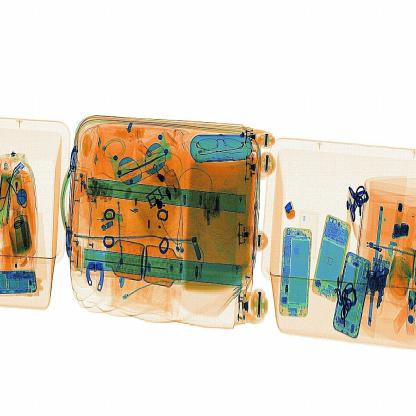

In [4]:
im = cv2.imread('/kaggle/input/x-ray-baggage-anomaly-detection/test/images/009127_jpg.rf.67531292a2589900150f91e51405d03a.jpg')
cv2_imshow(im)

In [5]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/25 04:29:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 202MB/s]                           
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# print the outputs
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([28], device='cuda:0')
Boxes(tensor([[ 62.8904, 116.3349, 270.3641, 320.6971]], device='cuda:0'))


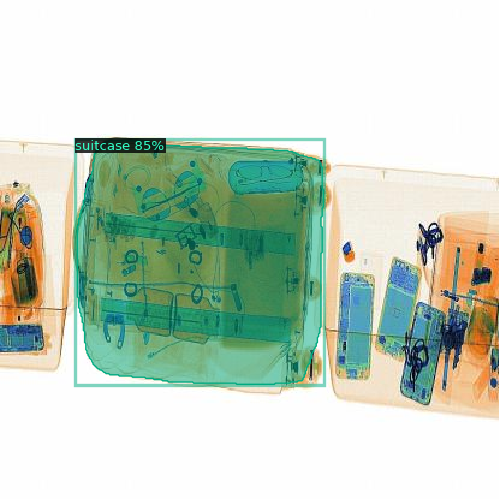

In [7]:
# we can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])